In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, accuracy_score, f1_score, precision_score, recall_score

In [2]:
#Loading the dataset
diabetes_data = pd.read_csv(r'C:/Users/myash/Downloads/Deep Learning/Assignment 1/diabetes.csv')

#Handling missing values
diabetes_data.dropna(inplace=True)  # Drop rows with missing values

#Display the rows
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


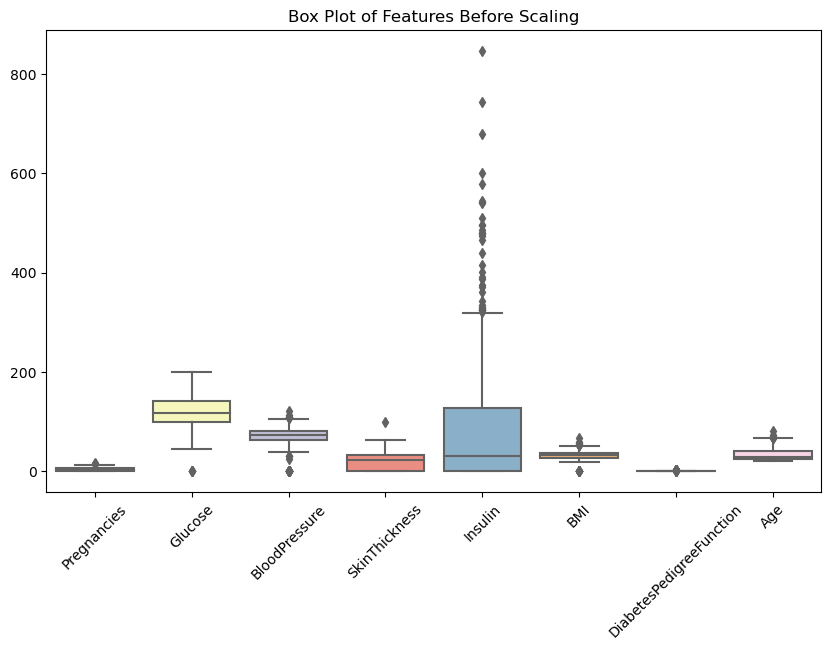

In [3]:
#Box plot before scaling
plt.figure(figsize=(10, 6))
sns.boxplot(data=diabetes_data.iloc[:, :-1], palette="Set3")
plt.title('Box Plot of Features Before Scaling')
plt.xticks(rotation=45)
plt.show()

In [4]:
#Splitting the dataset
X_features = diabetes_data.iloc[:, :-1].values  # All columns except the last one for features
y_target = diabetes_data.iloc[:, -1].values   # The last column is the target (0 or 1)

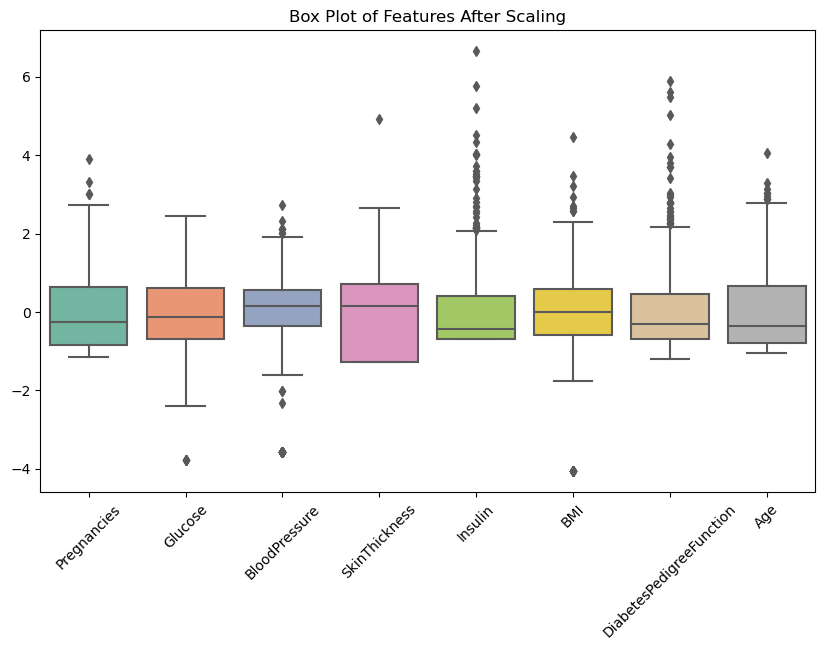

In [5]:
#Standardize the features
scaler_transformer = StandardScaler()
X_scaled_features = scaler_transformer.fit_transform(X_features)

#Box plot after scaling
plt.figure(figsize=(10, 6))
sns.boxplot(data=pd.DataFrame(X_scaled_features, columns=diabetes_data.columns[:-1]), palette="Set2")
plt.title('Box Plot of Features After Scaling')
plt.xticks(rotation=45)
plt.show()

In [6]:
#Split the dataset into training and testing sets
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X_scaled_features, y_target, test_size=0.2, random_state=42, stratify=y_target)

In [7]:
#Perceptron Model with cross-validation
model_perceptron = Perceptron(max_iter=1000, eta0=0.01, random_state=42)

cv_results = cross_val_score(model_perceptron, X_train_set, y_train_set, cv=5, scoring='accuracy')
print(f'Cross-Validated Accuracy: {cv_results.mean():.2f} (+/- {cv_results.std() * 2:.2f})')

#Training the model
model_perceptron.fit(X_train_set, y_train_set)

Cross-Validated Accuracy: 0.61 (+/- 0.21)


Perceptron(eta0=0.01, random_state=42)

In [8]:
#Predicting the results
y_predicted_set = model_perceptron.predict(X_test_set)
decision_scores = model_perceptron.decision_function(X_test_set)

#Final accuracy and F1-score
final_accuracy = accuracy_score(y_test_set, y_predicted_set)
final_f1 = f1_score(y_test_set, y_predicted_set)
print(f'Final Accuracy: {final_accuracy * 100:.2f}%')
print(f'F1-Score: {final_f1:.2f}')

Final Accuracy: 74.03%
F1-Score: 0.65


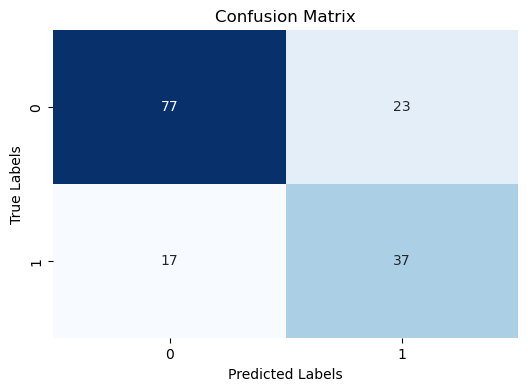

In [9]:
#Confusion Matrix
confusion_mtx = confusion_matrix(y_test_set, y_predicted_set)

#Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [10]:
#Classification Report
print("\nFinal Classification Report:\n", classification_report(y_test_set, y_predicted_set, zero_division=0))


Final Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.79       100
           1       0.62      0.69      0.65        54

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



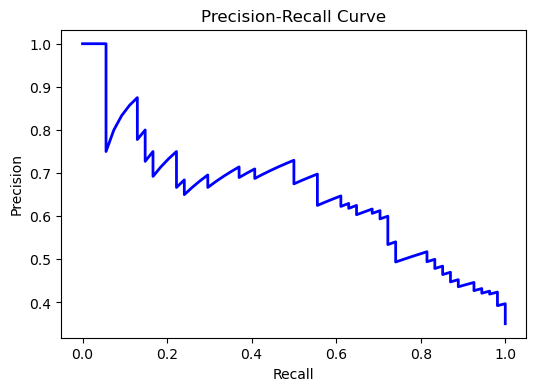

In [12]:
#Precision-Recall Curve
precision_values, recall_values, _ = precision_recall_curve(y_test_set, decision_scores)

plt.figure(figsize=(6, 4))
plt.plot(recall_values, precision_values, lw=2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


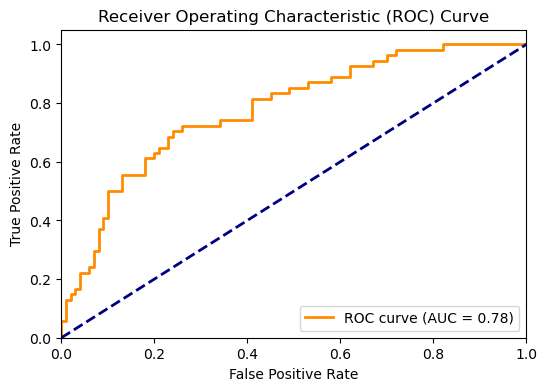

In [16]:
#ROC Curve and AUC
false_positive_rate, true_positive_rate, _ = roc_curve(y_test_set, decision_scores)
roc_area_under_curve = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(6, 4))
plt.plot(false_positive_rate, true_positive_rate, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_area_under_curve:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [18]:
#Final Summary
print("Final Summary:")
print(f"Accuracy: {final_accuracy * 100:.2f}%")
print(f"Area Under the ROC Curve (AUC): {roc_area_under_curve:.2f}")
print(f"F1-Score: {final_f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test_set, y_predicted_set, zero_division=0))

Final Summary:
Accuracy: 74.03%
Area Under the ROC Curve (AUC): 0.78
F1-Score: 0.65

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       100
           1       0.62      0.69      0.65        54

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



Final Summary:
Accuracy: 74.03%
Area Under the ROC Curve (AUC): 0.78
F1-Score: 0.65

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       100
           1       0.62      0.69      0.65        54

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154

